In [3]:
from scipy.integrate import quad
import numpy as np
from scipy.integrate import odeint
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scipy.integrate as spi
from scipy.integrate import solve_ivp
from scipy import integrate
import matplotlib.ticker
from accretion import*
from Luca import*
import math
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})




def x_e(z):
    if z>= z_rec:
        return 1
    else:
        return e_fraction


    
def λ_pbh(z, m):
    def β_cap_pbh(z, m):
        return 1e-4 * m * (((1+z)/1000)**(3/2)) * (((5.74e3 * (yr/pc))/v_eff(z))**3) * (0.257 + 1.45 * (x_e(z)/0.01) * (((1+z)/1000)**(5/2)))
    def x_cr_pbh(z, m):
        return (-1 + np.sqrt(1 + β_cap_pbh(z, m)))/β_cap_pbh(z, m) 
    return np.exp((9/2)/(3 + β_cap_pbh(z, m)**(0.75))) * (x_cr_pbh(z, m)**2)


def k(z, m):
    return 0.22 * ((1+z)/1000) * (M_halo(z, m)**(2/3)) * (((1e3 * (yr/pc))/v_eff(z))**2)


def λ_halo_extended(z, m):
    alpha = 2.25
    p = 3 - alpha
    power = p/(1-p)
    def β_cap_halo_pointmass(z, m):
        return 1e-4 *  M_halo(z, m) * (((1+z)/1000)**(3/2)) * (((5.74e3 * (yr/pc))/v_eff(z))**3) * (0.257 + 1.45 * (x_e(z)/0.01) * (((1+z)/1000)**(5/2)))
    def x_cr_halo_pointmass(z, m):
        return   ((-1 + np.sqrt(1 + β_cap_halo_pointmass(z, m)))/β_cap_halo_pointmass(z, m)) #((-1 + np.sqrt(1 + β_cap(z, m)))/β_cap(z, m))
    def λ_halo_pointmass(z, m):
        return np.exp((9/2)/(3 + β_cap_halo_pointmass(z, m)**(0.75))) * (x_cr_halo_pointmass(z, m)**2)
    def β_cap_halo_extended(z, m):
        return (k(z, m)**power) * β_cap_halo_pointmass(z, m)
    def x_cr_halo_extended(z, m):
        return ((k(z, m)/2)**power) *((-1 + np.sqrt(1 + β_cap_halo_extended(z, m)))/β_cap_halo_extended(z, m)) #((-1 + np.sqrt(1 + β_cap(z, m)))/β_cap(z, m))
    def λ_halo_extended(z, m):
        return np.exp((9/2)/(3 + β_cap_halo_extended(z, m)**(0.75))) * (x_cr_halo_extended(z, m)**2)
    def gamma_bar(z, m):
        return ((1 + 10 * β_cap_halo_extended(z, m))**(1/10)) * np.exp(2 - k(z, m)) * ((k(z, m)/2)**2)
    return (gamma_bar(z, m)**power) * λ_halo_extended(z, m)



def λ_halo_pointmass(z, m):
    def β_cap_halo_pointmass(z, m):
        return 1e-4 *  M_halo(z, m) * (((1+z)/1000)**(3/2)) * (((5.74e3 * (yr/pc))/v_eff(z))**3) * (0.257 + 1.45 * (x_e(z)/0.01) * (((1+z)/1000)**(5/2)))
    def x_cr_halo_pointmass(z, m):
        return   ((-1 + np.sqrt(1 + β_cap_halo_pointmass(z, m)))/β_cap_halo_pointmass(z, m)) #((-1 + np.sqrt(1 + β_cap(z, m)))/β_cap(z, m))
    return np.exp((9/2)/(3 + β_cap_halo_pointmass(z, m)**(0.75))) * (x_cr_halo_pointmass(z, m)**2)


    

def m_dot_pbh(z, m):
    y = np.array(m, dtype = np.longdouble)
    if z < 0 or z == 0:
        print("i =",   i, ",", "z =", z)
    return  2.7e-3 * λ_pbh(z, m) * (((1+z)/1000)**3) *  y * (((5.74e3 * (yr/pc))/v_eff(z))**3) 



def m_dot_halo(z, m):  
    y = np.array(m, dtype = np.longdouble)
    if z < 0 or z == 0:
        print("i =",   i, ",", "z =", z)
    if k(z, m)<2:
        λ_halo = λ_halo_extended(z, m)
    else:
        λ_halo = λ_halo_pointmass(z, m)
    return 0.016 * λ_halo * (((1+z)/1000)) *  y * (((5.74e3 * (yr/pc))/v_eff(z))**3)  


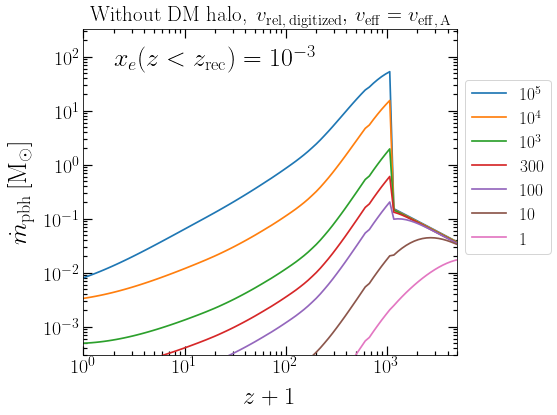

In [2]:
colors = ['C0', 'C1','C2','C3','C4', 'C5']
fig,ax = plt.subplots(1, figsize = (6.7, 6))
plt.rc('lines', linewidth = 1.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')



mi_arr = np.array([1e5, 1e4, 1000, 300, 100, 10, 1])
z_array = np.geomspace(1e4, 1, 100)
m_dot_arr = np.zeros(len(z_array))


e_fraction = 1e-3
for i, m in enumerate(mi_arr):
    for i, z in enumerate(z_array):
        m_dot_arr[i] = m_dot_pbh(z, m)

    plt.loglog(z_array, m_dot_arr)
    

plt.text(2, 70, '$x_{e}(z < z_\mathrm{rec}) = 10^{-3}$', fontsize = 26)
plt.xlabel('$z+1$',  fontsize = 24.5, labelpad = 10)
plt.ylabel(' $\dot m_\mathrm{pbh} \, \mathrm{[M_{\odot}]}$', fontsize = 26, labelpad = 10)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend( ['$10^{5}$' ,  '$10^{4}$', '$10^{3}$', '$300$','$100$', '$10$','$1$'],
           title_fontsize = 12, loc = (1.02, 0.31), prop = {"size":17.3})
plt.ylim(3e-4, 330)
plt.xlim(1, 5000)
plt.title('Without DM halo, $\,v_\mathrm{rel,\, digitized},\, v_\mathrm{eff} = v_\mathrm{eff,\, A}$', fontsize = 21, pad = 8)
plt.savefig('m_dot_pbh_xe1e-3.pdf', bbox_inches = 'tight')
plt.show()

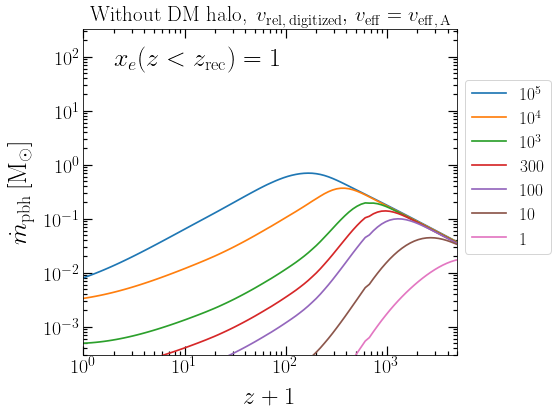

In [3]:
colors = ['C0', 'C1','C2','C3','C4', 'C5']
fig,ax = plt.subplots(1, figsize = (6.7, 6))
plt.rc('lines', linewidth = 1.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')


mi_arr = np.array([1e5, 1e4, 1000, 300, 100, 10, 1])
z_array = np.geomspace(1, 1e4, 100)
m_dot_arr = np.zeros(len(z_array))



e_fraction = 1
for i, m in enumerate(mi_arr):
    for i, z in enumerate(z_array):
        m_dot_arr[i] = m_dot_pbh(z, m)

    plt.loglog(z_array, m_dot_arr)
    

plt.text(2, 70, '$x_{e}(z < z_\mathrm{rec}) = 1$', fontsize = 26)
plt.xlabel('$z+1$',  fontsize = 24.5, labelpad = 10)
plt.ylabel('$\dot m_\mathrm{pbh} \, \mathrm{[M_{\odot}]}$', fontsize = 26, labelpad = 10)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend( [ '$10^{5}$' ,  '$10^{4}$', '$10^{3}$', '$300$','$100$', '$10$','$1$'],
           title_fontsize = 12, loc = (1.02, 0.31), prop = {"size":17.3})
plt.ylim(3e-4, 330)
plt.xlim(1, 5000)
plt.title('Without DM halo, $\,v_\mathrm{rel,\, digitized},\, v_\mathrm{eff} = v_\mathrm{eff,\, A}$', fontsize = 21, pad = 8)
plt.savefig('m_dot_pbh_xe1.pdf', bbox_inches = 'tight')
plt.show()

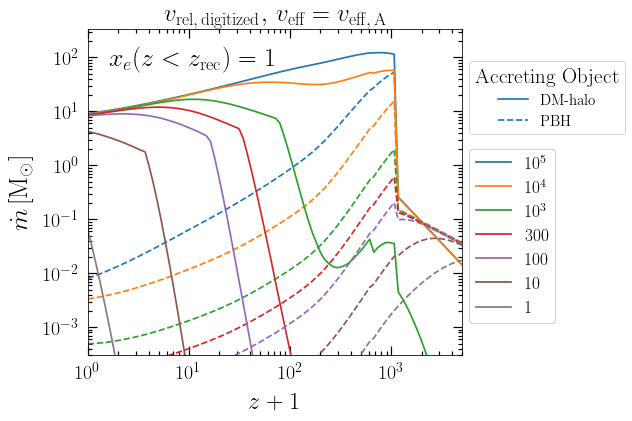

In [4]:
colors = ['C0', 'C1','C2','C3','C4', 'C5']
fig,ax = plt.subplots(1, figsize = (6.7, 6))
plt.rc('lines', linewidth = 1.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')


mi_arr = np.array([1e5, 1e4, 1000, 300, 100, 10, 1])
z_arr = np.geomspace(1, 1e4, 100)
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C7']
m_dot_halo_arr = np.zeros(len(z_arr))
m_dot_pbh_arr = np.zeros(len(z_arr))
e_fraction = 1e-3
for i, (m, color) in enumerate(zip(mi_arr, colors)):
    for j, z in enumerate(z_arr):
        m_dot_halo_arr[j] = m_dot_halo(z, m)
        m_dot_pbh_arr[j] = m_dot_pbh(z, m)
    ax.loglog(z_arr, m_dot_halo_arr, color = color)
    ax.loglog(z_arr, m_dot_pbh_arr, color = color, ls = '--')


ax.tick_params(axis='x', pad = 8.9)
ax.tick_params(axis='y', pad = 8.9)
lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], ["DM-halo", "PBH"], title = 'Accreting Object',
        title_fontsize = 21, loc = (1.02, 0.68), prop = {"size":15})
legend2 = plt.legend([lines[i] for i in [0,2,4,6, 8, 10, 12]], [ '$10^{5}$' ,  '$10^{4}$', '$10^{3}$', '$300$','$100$', '$10$','$1$'],
           title_fontsize = 12, loc = (1.02, 0.1), prop = {"size":17.3})

ax.add_artist(legend1)
ax.add_artist(legend2)
    
plt.text(1.6, 70, '$x_{e}(z < z_\mathrm{rec}) = 1$', fontsize = 26)
plt.xlabel('$z+1$',  fontsize = 24.5, labelpad = 10)
plt.ylabel('$\dot m \, \mathrm{[M_{\odot}]}$', fontsize = 26, labelpad = 10)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylim(3e-4, 330)
plt.xlim(1, 5000)
plt.title(' $\,v_\mathrm{rel,\, digitized},\, v_\mathrm{eff} = v_\mathrm{eff,\, A}$', fontsize = 25, pad = 8)
plt.savefig('m_dot_halo_xe1e-3.pdf', bbox_inches = 'tight')
plt.show()

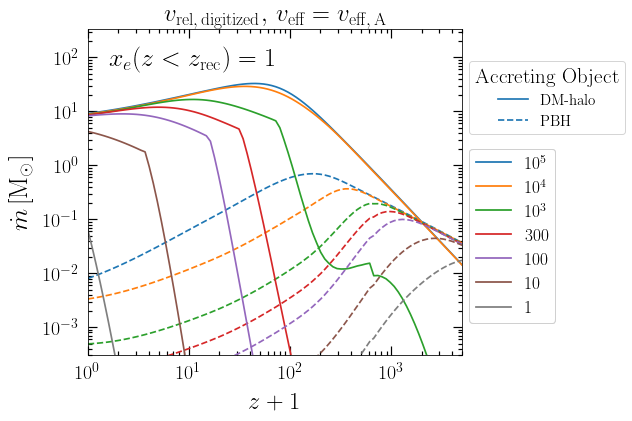

In [5]:
colors = ['C0', 'C1','C2','C3','C4', 'C5']
fig,ax = plt.subplots(1, figsize = (6.7, 6))
plt.rc('lines', linewidth = 1.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')


mi_arr = np.array([1e5, 1e4, 1000, 300, 100, 10, 1])
z_arr = np.geomspace(1, 1e4, 100)
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C7']
m_dot_halo_arr = np.zeros(len(z_arr))
m_dot_pbh_arr = np.zeros(len(z_arr))
e_fraction = 1
for i, (m, color) in enumerate(zip(mi_arr, colors)):
    for j, z in enumerate(z_arr):
        m_dot_halo_arr[j] = m_dot_halo(z, m)
        m_dot_pbh_arr[j] = m_dot_pbh(z, m)
    ax.loglog(z_arr, m_dot_halo_arr, color = color)
    ax.loglog(z_arr, m_dot_pbh_arr, color = color, ls = '--')
    


ax.tick_params(axis='x', pad = 8.9)
ax.tick_params(axis='y', pad = 8.9)
lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], ["DM-halo", "PBH"], title = 'Accreting Object',
        title_fontsize = 21, loc = (1.02, 0.68), prop = {"size":15})
legend2 = plt.legend([lines[i] for i in [0,2,4,6, 8, 10, 12]], [ '$10^{5}$' ,  '$10^{4}$', '$10^{3}$', '$300$','$100$', '$10$','$1$'],
           title_fontsize = 12, loc = (1.02, 0.1), prop = {"size":17.3})

ax.add_artist(legend1)
ax.add_artist(legend2)
    
plt.text(1.6, 70, '$x_{e}(z < z_\mathrm{rec}) = 1$', fontsize = 26)
plt.xlabel('$z+1$',  fontsize = 24.5, labelpad = 10)
plt.ylabel('$\dot m \, \mathrm{[M_{\odot}]}$', fontsize = 26, labelpad = 10)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylim(3e-4, 330)
plt.xlim(1, 5000)
plt.title(' $\,v_\mathrm{rel,\, digitized},\, v_\mathrm{eff} = v_\mathrm{eff,\, A}$', fontsize = 25, pad = 8)
plt.savefig('m_dot_halo_xe1.pdf', bbox_inches = 'tight')
plt.show()

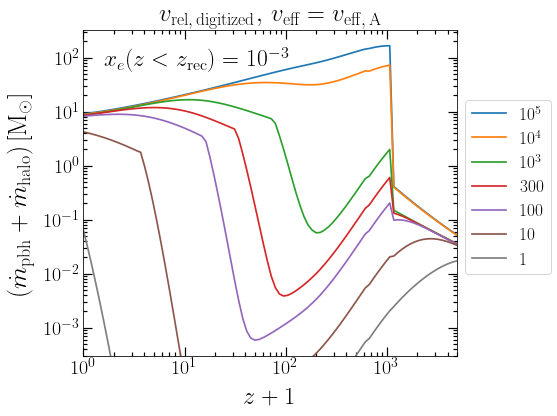

In [6]:
colors = ['C0', 'C1','C2','C3','C4', 'C5']
fig,ax = plt.subplots(1, figsize = (6.7, 6))
plt.rc('lines', linewidth = 1.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')


mi_arr = np.array([1e5, 1e4, 1000, 300, 100, 10, 1])
z_arr = np.geomspace(1, 1e4, 100)
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C7']
m_dot_total_arr = np.zeros(len(z_arr))

e_fraction = 1e-3
for i, (m, color) in enumerate(zip(mi_arr, colors)):
    for j, z in enumerate(z_arr):
        m_dot_total_arr[j] = m_dot_halo(z, m) + m_dot_pbh(z, m)
    ax.loglog(z_arr, m_dot_total_arr, color = color)
    




    
plt.text(1.6, 70, '$x_{e}(z < z_\mathrm{rec}) = 10^{-3}$', fontsize = 23.5)
plt.xlabel('$z+1$',  fontsize = 24.5, labelpad = 10)
plt.ylabel('$(\dot m_\mathrm{pbh} + \dot m_\mathrm{halo}) \, \mathrm{[M_{\odot}]}$', fontsize = 26, labelpad = 10)
plt.legend([ '$10^{5}$' ,  '$10^{4}$', '$10^{3}$', '$300$','$100$', '$10$','$1$'],
           title_fontsize = 12, loc = (1.02, 0.25), prop = {"size":17.3})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylim(3e-4, 330)
plt.xlim(1, 5000)
plt.title(' $\,v_\mathrm{rel,\, digitized},\, v_\mathrm{eff} = v_\mathrm{eff,\, A}$', fontsize = 25, pad = 8)
plt.savefig('m_dot_pbhhalo_xe1e-3.pdf', bbox_inches = 'tight')
plt.show()

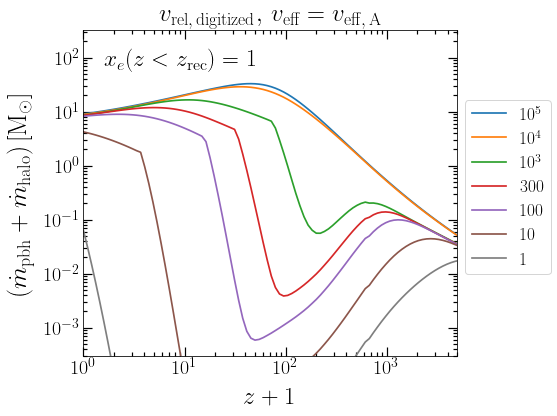

In [8]:
colors = ['C0', 'C1','C2','C3','C4', 'C5']
fig,ax = plt.subplots(1, figsize = (6.7, 6))
plt.rc('lines', linewidth = 1.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')


mi_arr = np.array([1e5, 1e4, 1000, 300, 100, 10, 1])
z_arr = np.geomspace(1, 1e4, 100)
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C7']
m_dot_total_arr = np.zeros(len(z_arr))

e_fraction = 1
for i, (m, color) in enumerate(zip(mi_arr, colors)):
    for j, z in enumerate(z_arr):
        m_dot_total_arr[j] = m_dot_halo(z, m) + m_dot_pbh(z, m)
    ax.loglog(z_arr, m_dot_total_arr, color = color)
    




    
plt.text(1.6, 70, '$x_{e}(z < z_\mathrm{rec}) = 1$', fontsize = 23.5)
plt.xlabel('$z+1$',  fontsize = 24.5, labelpad = 10)
plt.ylabel('$(\dot m_\mathrm{pbh} + \dot m_\mathrm{halo}) \, \mathrm{[M_{\odot}]}$', fontsize = 26, labelpad = 10)
plt.legend([ '$10^{5}$' ,  '$10^{4}$', '$10^{3}$', '$300$','$100$', '$10$','$1$'],
           title_fontsize = 12, loc = (1.02, 0.25), prop = {"size":17.3})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylim(3e-4, 330)
plt.xlim(1, 5000)
plt.title(' $\,v_\mathrm{rel,\, digitized},\, v_\mathrm{eff} = v_\mathrm{eff,\, A}$', fontsize = 25, pad = 8)
plt.savefig('m_dot_pbhhalo_xe1.pdf', bbox_inches = 'tight')
plt.show()

In [6]:
def m_dot_pbh_halo(z, m):
    y = np.array(m, dtype = np.longdouble)
    if z < 0 or z == 0:
        print("i =",   i, ",", "z =", z)
    if k(z, m)<2:
        λ_halo = λ_halo_extended(z, m)
    else:
        λ_halo = λ_halo_pointmass(z, m)
    return 1.6e-2 * (λ_halo)  * (((1+z)/1000)**2) *  y * (((5.74e3 * (yr/pc))/v_eff(z))**3) 


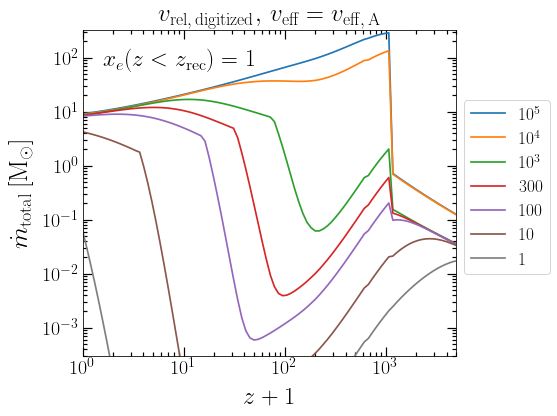

In [9]:
colors = ['C0', 'C1','C2','C3','C4', 'C5']
fig,ax = plt.subplots(1, figsize = (6.7, 6))
plt.rc('lines', linewidth = 1.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')


mi_arr = np.array([1e5, 1e4, 1000, 300, 100, 10, 1])
z_arr = np.geomspace(1, 1e4, 100)
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C7']
m_dot_total_arr = np.zeros(len(z_arr))

e_fraction = 1e-3
for i, (m, color) in enumerate(zip(mi_arr, colors)):
    for j, z in enumerate(z_arr):
        m_dot_total_arr[j] = m_dot_halo(z, m) + m_dot_pbh(z, m) + m_dot_pbh_halo(z, m)
    ax.loglog(z_arr, m_dot_total_arr, color = color)
    




    
plt.text(1.6, 70, '$x_{e}(z < z_\mathrm{rec}) = 1$', fontsize = 23.5)
plt.xlabel('$z+1$',  fontsize = 24.5, labelpad = 10)
plt.ylabel('$\dot m_\mathrm{total} \, \mathrm{[M_{\odot}]}$', fontsize = 26, labelpad = 10)
plt.legend([ '$10^{5}$' ,  '$10^{4}$', '$10^{3}$', '$300$','$100$', '$10$','$1$'],
           title_fontsize = 12, loc = (1.02, 0.25), prop = {"size":17.3})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylim(3e-4, 330)
plt.xlim(1, 5000)
plt.title(' $\,v_\mathrm{rel,\, digitized},\, v_\mathrm{eff} = v_\mathrm{eff,\, A}$', fontsize = 25, pad = 8)
plt.savefig('m_dot_total_xe1e-3.pdf', bbox_inches = 'tight')
plt.show()

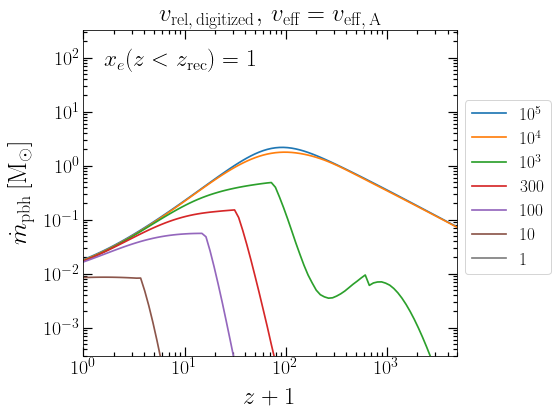

In [10]:
colors = ['C0', 'C1','C2','C3','C4', 'C5']
fig,ax = plt.subplots(1, figsize = (6.7, 6))
plt.rc('lines', linewidth = 1.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')


mi_arr = np.array([1e5, 1e4, 1000, 300, 100, 10, 1])
z_arr = np.geomspace(1, 1e4, 100)
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C7']
m_dot_total_arr = np.zeros(len(z_arr))

e_fraction = 1
for i, (m, color) in enumerate(zip(mi_arr, colors)):
    for j, z in enumerate(z_arr):
        m_dot_total_arr[j] =  m_dot_pbh_halo(z, m)
    ax.loglog(z_arr, m_dot_total_arr, color = color)
    




    
plt.text(1.6, 70, '$x_{e}(z < z_\mathrm{rec}) = 1$', fontsize = 23.5)
plt.xlabel('$z+1$',  fontsize = 24.5, labelpad = 10)
plt.ylabel('$\dot m_\mathrm{pbh}  \, \mathrm{[M_{\odot}]}$', fontsize = 26, labelpad = 10)
plt.legend([ '$10^{5}$' ,  '$10^{4}$', '$10^{3}$', '$300$','$100$', '$10$','$1$'],
           title_fontsize = 12, loc = (1.02, 0.25), prop = {"size":17.3})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylim(3e-4, 330)
plt.xlim(1, 5000)
plt.title(' $\,v_\mathrm{rel,\, digitized},\, v_\mathrm{eff} = v_\mathrm{eff,\, A}$', fontsize = 25, pad = 8)
plt.savefig('m_dot_total_xe1.pdf', bbox_inches = 'tight')
plt.show()

In [7]:
def M_halo(z, m):
        f_pbh = 1e-3
        z_cut_halo = (3 * 1000 * f_pbh) - 1
        if z < z_cut_halo:
            return 3 * y * (((1+z)/1000)**(-1))
        else:
            return 3 * y * (((1+z_cut_halo)/1000)**(-1))
    
    
def r_B(z, m):
        return (G * y)/(v_eff(z)**2)
    
def r_cr(z, m):
        return ((-1 + np.sqrt(1 + β_cap(z, m)))/β_cap(z, m)) * r_B(z, m)
    
def r_cr_halo(z, m):
                return ((k(z, m)/2)**power) * r_cr(z, m)


In [8]:
4 * 3.14 * (6.67e-11**2)* 2e8 * 1.67e-27

1.86632715056e-38

In [9]:
(1.866e-38 * (1.989e30**2))/(5.74e3**3)

390342220630.0931

In [10]:
3.903e11/1.44e14

0.0027104166666666665